# **Showcase Notebook**

## **Initial Imports**

In [1]:
import sys
sys.path.append(sys.path[0] + "\\class")
from agros import Agros

In [2]:
FILE_URL = (
    "https://github.com/owid/owid-datasets/blob/"
    "693acdec5821af0a1b73523905d2a6ccefd6d509/datasets/"
    "Agricultural%20total%20factor%20productivity%20(USDA)/"
    "Agricultural%20total%20factor%20productivity%20(USDA).csv?raw=true"
)

agros = Agros(FILE_URL)
data = agros.import_file()

## **Part One: Initial Analysis**

To better understand global agricultural production and output, we begin our Analysis with a brief overview of global production. For this purpose, we employ our custom gapminder method, a python method which, for a given year, creates a scatterplot of all countries, plotting their fertilizer quantity, on the x-axis, against their total agricultural output, on the y-axis. The method presents each country as an individual data point allocating a size depending on its total irrigation quantity.

Our group of Analysts chose to include irrigation as an additional factor in our analysis because we are interested in exploring a detailed global picture with multiple facets. Irrigation is a generally known factor in natural resource management in global agriculture. We hoped to find insightful relationships, and after our preliminary analysis found a decent correlation between Irrigation and total output, we included it here.

---------

**Interpretation (gapminder method)**

A close look at the generated scatterplot with a standard scale reveals an apparent positive correlation between fertilizer_quantity and output_quantity and irrigation and output_quantity. This means that on a global level, greater total output moves with greater employment of fertilizer and irrigation water consumption. This does not come as a surprise because the values are not adjusted to the countries' respective industry sizes. Hence, greater agricultural industries automatically consume greater fertilizer quantities and irrigation.

The values' positioning within the scale shows only slight spreadS in fertilizer quantities or irrigation at different output levels. Difficulties with the identification of strong outliers, i.e., countries that produce much greater output with fewer resources employed, could either indicate that the scale is not good enough for visual differentiation or that the differences are marginal. For further investigation, we would propose a regression analysis and subsequent testing of the linear relationship between our variables. 

Missing relativization leaves our analysis focused on the general difference in output size. We note that there are four countries with enormous total output on a global scale. A closer investigation in the data reveals them as **China, India, United States, and Brazil**. These countries produce a multiple of the other countries' agricultural output. Hence making them the global leaders in agricultural production. 

To better analyze the smaller players, we extended our **gapminder method** with another **parameter**, the **logscale**. Setting this parameter to **True** displays the same data on a logarithmic scale. The changed representation of our data points reveals two exciting factors: 

- **First:** The biggest players' true dimension of output in comparison to the smallest players.
- **Second:** The lower the overall fertilizer consumption of a country is, the greater the variability in output.

The first observation reinforces the image represented by the regular scale; however, the second observation could imply that for countries with smaller overall production output, the relationship between fertilizer employment, irrigation, and output appear much weaker. We hypothesize for a country to generate immense agricultural output, specific factors must be given (e.g., farmland, precipitation) in order to scale with fertilizer employment. However, for other countries, factors other than fertilizer employment limit the production capacity.


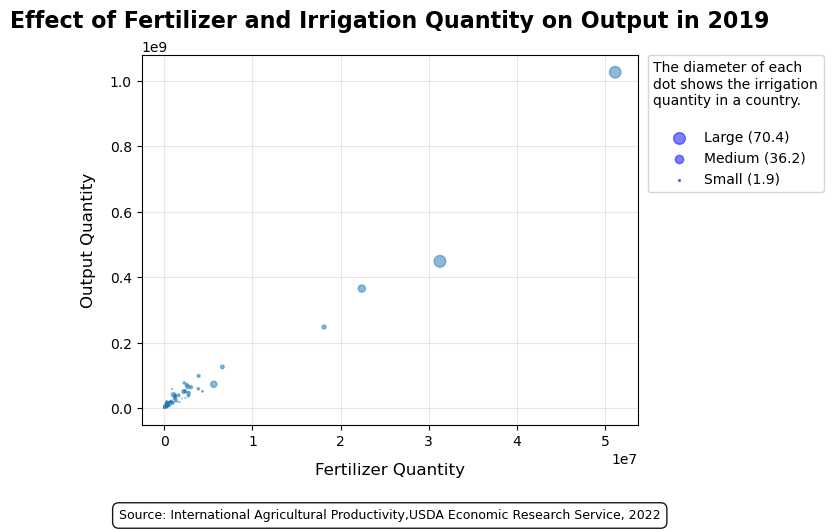

In [3]:
most_recent_year = data["Year"].max()
agros.gapminder(year = most_recent_year,logscale = False)

## **Part Two: Country Selection and Comparison**

In the second part of our analysis we select three countries from different continents and take a closer look at the differences in their agricultural industries and their development over time.

We initiate the analysis with our **area_chart** method that allows us to create a visual seperation of each country's agricultural industry. The method returns layer charts. For bettter relative analysis you can set the mehtod's normalize argument to True and choose to either insert a single string, or call a list of country names.

The following countries form our selection:

- **Angola (Africa)**
- **Belgium (Europe)**
- **Argentina (South America)**

-----------------

**Component Analysis (method four: areachart())**


Running the **area_chart** method on Angola, Belgium, and Argentina reveals that for all three countries crop_output and animal_output constitute the most significant part of their agricultural industry. Fish_output_quantities contribute only marginally to the overall output. When calling for the normalized area chart, fish_output almost disappears for all three countries. This just goes to udnerline the insignificance of fish_output for these coutnries' overall output.

The second observation is that contrary to Belgium, where neither the total output of agriculture nor the output's relative composition of crop, animal, and fish output changed significantly over the past decades, Argentina and Angola experienced output growth. For both Argentina and Angola, agricultural growth appears to be driven by crop_output. The greater crop production was in fact so strong that it shiftedthe overall proportions of agricultural components for the two countries.

Summarizing the findings of this first method, we can say that Belgium's agricultural industry appears to have maintained its current size over the last decades while Angola and Argentina experienced growth primarily driven by crop production. Both of the latter countries have manaaged to reach new peak output levels in recent years.

-------

**Total Industry Comparison (method five: total_output())**

Applying the **total_output** method on Angola,  Belgium, and Argentina presents a stacked area chart of total output for all three countries.
The side-by-side comparison points out the size difference between the countries' industries. The Argentinian industry produces multiple of the other countries' outputs. It is, in fact, so large that the differences between the other two are hard to point out clearly. However, under closer investigation, we can see that while the Angolan industry started smaller than the Belgian, it has closed the size gap over the last decades more and more. Should Angola continue to grow its output, it is likely to surpass Belgium, however it is still worlds apart from the Argentinian production. 

Concluding we can say that over the past decades, Angola managed to catch up with the relatively stagnant Belgian agricultural output. Nevertheless, Argentina remains the most significant player producing multiple of the other countries' production.


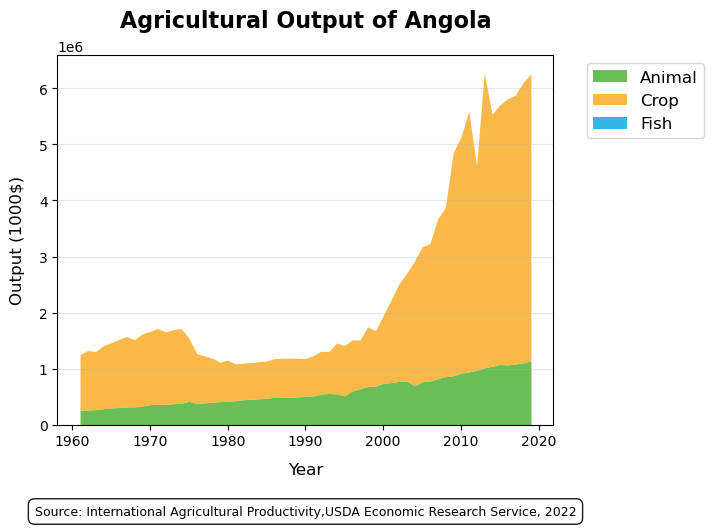

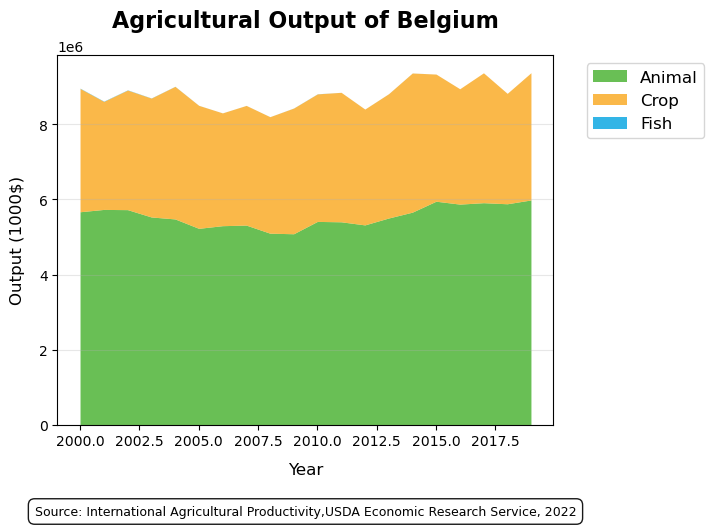

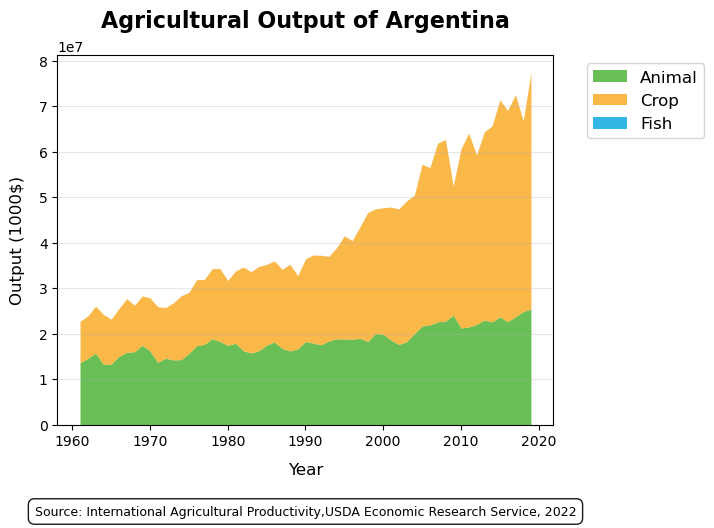

In [4]:
#individual industry components per country
agros.area_chart(country = ["Angola", "Belgium", "Argentina"], normalize = False)

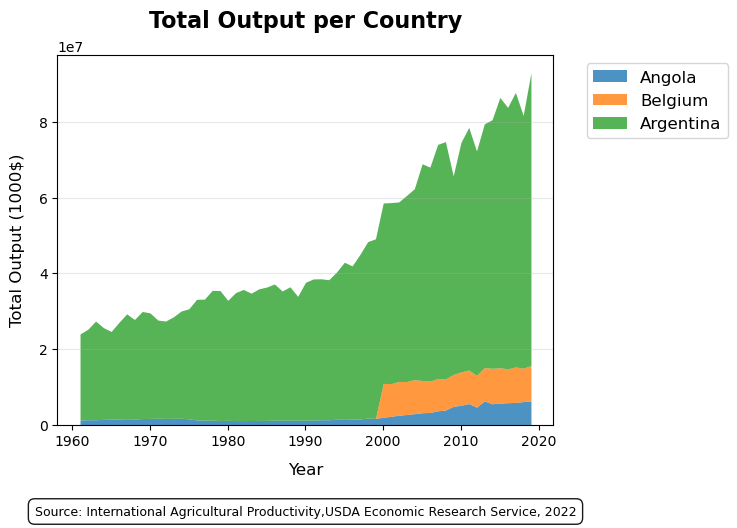

In [5]:
#total output layer chart
agros.total_output(countries = ["Angola", "Belgium", "Argentina"])

## **Part Three: Correlation Analysis**

**Rationale for Further Analysis**

So far our analysis has explored the global distribution countries' agricultural industries in connection with their fertilizer consumption and irrigation, as well as the more intricate composition of agrarian industries in three countries based on different continents. Both parts of the analysis revealed the differences that characterize countries' agriculture. Now, we explore the similarities. To better identify relationships in global agriculture, we will continue with a correlation analysis of input and output factors.

------

**Correlation Analysis (method three)**

This part of the analysis employs the **corr_quantity** method, creating a correlation matrix between all quantity variables and input variables. A quick investigation of the correlation matrix reveals an exciting image in which most variables exhibit strong positive correlations. The number of strong positive correlations is so high that identifying the weaker correlations would appear more straightforward, most of which are related to the fish output quantity. Intuitively we would allocate the lower correlations in connection with fish_output to the fact that this part of agriculture requires a different set of inputs than life stock and crop production. Here the highest correlations are found with machinery, and the other overall output quantities, which are likely closely connected with the country's overall agricultural industry.

One possible interpretation of the fact that all other inputs have such strong positive correlations with the output and each other could be that the production of agricultural outputs in terms of livestock and crops requires a similar mixture of inputs all around the world. Hence, inputs are not easily substitutable. Under this assumption, we would expect the countries that produce the most crops and livestock to have the most outstanding and cheapest access to all required resources. This would imply that for a  country to become a leading producer of agricultural output other than fish, it will need good access to extensive farmland, affordable labor, decent capital, access to irrigation water, machinery, etc.

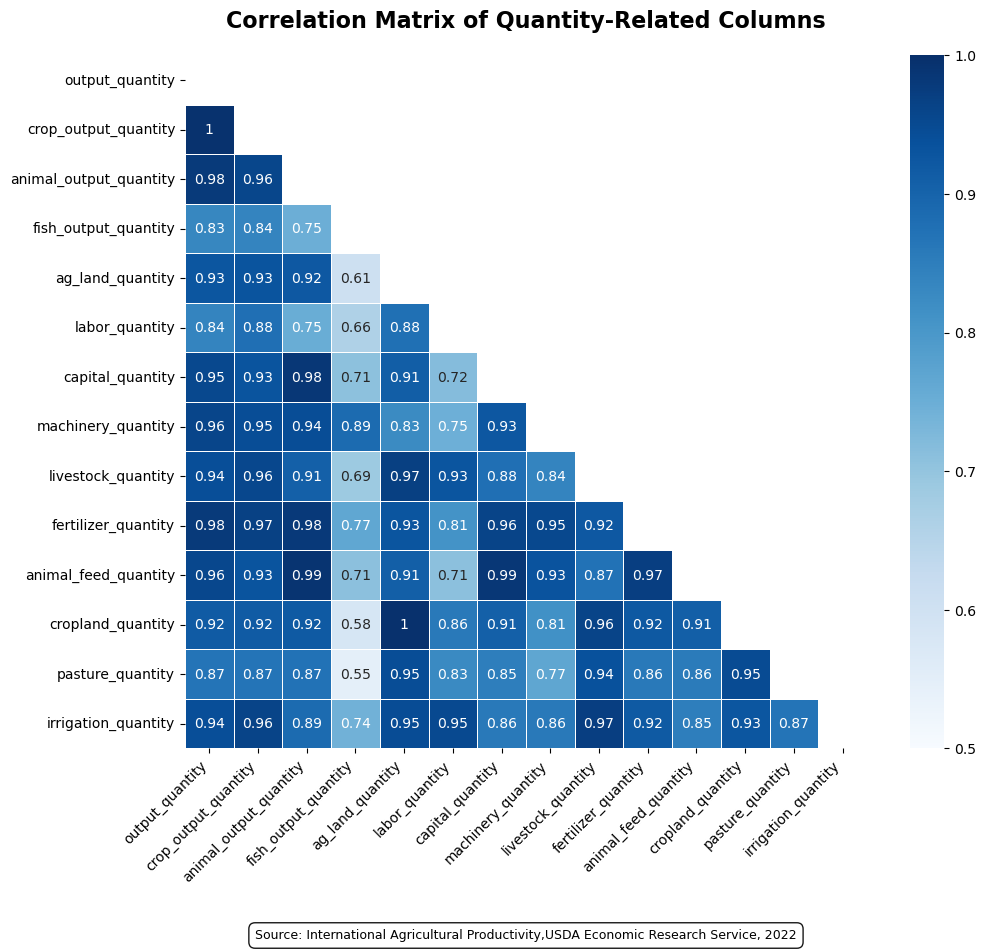

In [6]:
agros.corr_quantity()

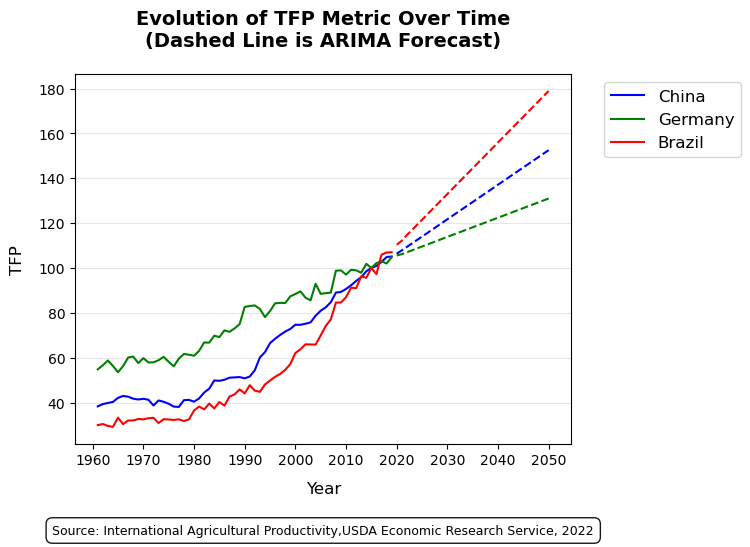

In [7]:
agros.predictor(["China", "Germany", "Brazil"])

## **Part Four: Final Summary**

**Overall Analysis**

The earlier parts of our Analysis revealed three major insights:
On a global scale, different agricultural industries produce much greater outputs than the rest of the world while consuming significantly more fertilizer and irrigation water.
Agricultural industries differ between countries, not only in size but also in growth rates and specialization.
**Agricultural inputs for other areas than fish output are highly correlated with each other and their outputs.**

Specifically, the last point leads us to believe that creating agricultural outputs regarding livestock and crops requires **similar inputs worldwide**. On one side, this means that with global markets and competition, those countries with greater availability of information at a lower cost will outperform the rest. On the other side, this also implies that both branches of these agricultural industries will be affected by the same factors, such as environmental catastrophes (droughts, flooding, pollution, climate change, etc.), political decisions (taxation, subsidies, etc.), or simple economic factors (recessions, inflation, international competition).

----